In [1]:
# !brew install poppler tesseract libmagic

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:20fa657858e44a4b39171d6e4111f8a9716eb62a78ebbd1491d94f90bb7b830a
######################################################################### 100.0%
==> Pouring portable-ruby-3.4.5.arm64_big_sur.bottle.tar.gz
==> Auto-updated Homebrew!
==> Updated Homebrew from 4.5.2 (c089d8b9da) to 4.6.10 (c5b8cc906e).
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
abpoa: SIMD-based C library for fast partial order alignment using adaptive band
act_runner: Action runner for Gitea based on Gitea's fork of act
addlicense: Scan directories recursively to ensure source files have license headers
addons-linter: Firefox Add-ons linter, written in JavaScript
aiac: Artificial Intelligence Infrastructure-as-Code Generato

In [3]:
%pip install unstructured
# %pip install -Uq langchan_chroma
# %pip install -Uq langchain langchain-community langchain-openai
# %pip install -Uq python-dotenv

%pip install "ml-dtypes>=0.5.1"

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 667.4/667.4 kB 19.9 MB/s  0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.5.3 which is incompatible.
tensorflow-macos 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 6.32.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
from typing import List
from unstructured.partition.pdf import partition_pdf
from unstructured.chunking.title import chunk_by_title
from langchain_core.documents import Document
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_chroma import Chroma
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv

load_dotenv()

[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [SSL: CERTIFICATE_VERIFY_FAILED] certificate
[nltk_data]     verify failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1002)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


True

In [5]:
def parition_document(file_path:str):
    """Extract elements form PDF using unstructured"""
    print(f"Patitioning document: {file_path}")

    elements = partition_pdf(
        filename = file_path,
        strategy = 'hi_res',
        infer_table_structure = True,
        extract_image_block_types = ["Image"],
        extract_image_block_to_payload = True
    )

    print(f'Extrcted {len(elements)} elements')

    return elements
file_path = './docs/attention_is_all_you_need.pdf'
elements = parition_document(file_path)

Patitioning document: ./docs/attention_is_all_you_need.pdf


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Extrcted 186 elements


In [6]:
set([str(type(el)) for el in elements])

{"<class 'unstructured.documents.elements.FigureCaption'>",
 "<class 'unstructured.documents.elements.Footer'>",
 "<class 'unstructured.documents.elements.Formula'>",
 "<class 'unstructured.documents.elements.Header'>",
 "<class 'unstructured.documents.elements.Image'>",
 "<class 'unstructured.documents.elements.ListItem'>",
 "<class 'unstructured.documents.elements.NarrativeText'>",
 "<class 'unstructured.documents.elements.Table'>",
 "<class 'unstructured.documents.elements.Text'>",
 "<class 'unstructured.documents.elements.Title'>"}

In [20]:
elements[21].to_dict()

{'type': 'Title',
 'element_id': 'acf075cad3c8d73d1f4861ce0efdb7f8',
 'text': '1 Introduction',
 'metadata': {'detection_class_prob': 0.9067491888999939,
  'coordinates': {'points': ((295.11419677734375, 206.1743927001953),
    (295.11419677734375, 233.31759643554688),
    (536.1755981445312, 233.31759643554688),
    (536.1755981445312, 206.1743927001953)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-09-08T16:17:50',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 2,
  'file_directory': './docs',
  'filename': 'attention_is_all_you_need.pdf',
  'parent_id': 'aa6877b9c6f6be20a1dfe13c5011250c'}}

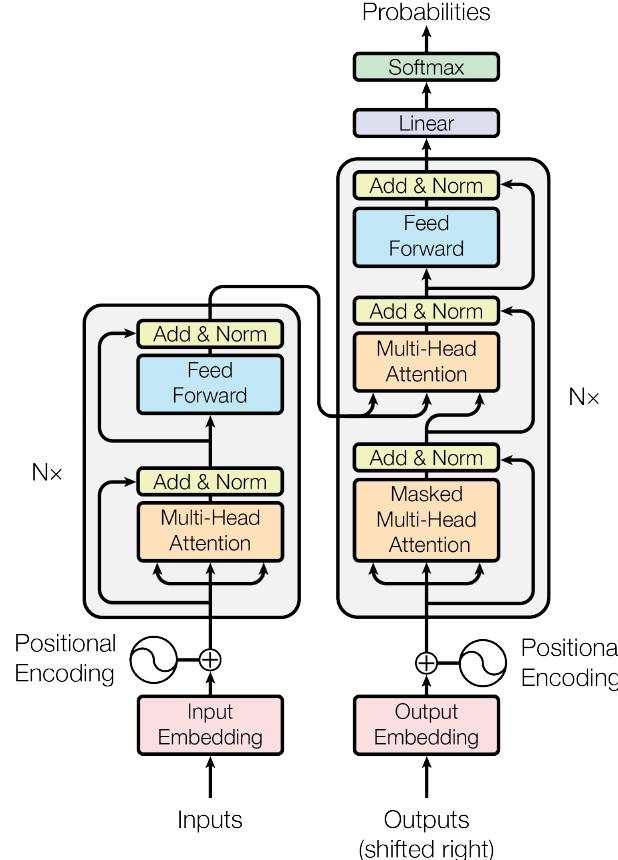

In [29]:
images = [element for element in elements if element.category =='Image']

img =images[0].to_dict()

from io import BytesIO
from PIL import Image
import base64
import numpy as np

def base64_to_pil_image(b64: str) -> Image.Image:
    return Image.open(BytesIO(base64.b64decode(b64)))


base64_to_pil_image(img['metadata']['image_base64'])

In [30]:
tables = [element for element in elements if element.category =='Table']

In [36]:
tables[0].to_dict()

import pandas as pd

df = pd.read_html(tables[0].to_dict()['metadata']['text_as_html'])
df

/var/folders/60/vghqvygx7llbt82j0jcc3zsh0000gn/T/ipykernel_94954/1924236039.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(tables[0].to_dict()['metadata']['text_as_html'])


[                    Layer Type Complexity per Layer Sequential Operations  \
 0               Self-Attention            O(n? - d)                  O(1)   
 1                    Recurrent            O(n - d?)                  O(n)   
 2                Convolutional            O(k-n-d?)                  O(1)   
 3  Self-Attention (restricted)             O(r-n-d)                   ol)   
 
   Maximum Path Length  
 0                O(1)  
 1                O(n)  
 2          O(logx(n))  
 3              O(n/r)  ]

In [60]:
from unstructured.chunking.title import chunk_by_title

def create_chunk_by_title(elements):
    """Create Itelligent chunk using title-based strategy"""
    print("Creating smart chunks...")

    chunks = chunk_by_title(
        elements,
        max_characters = 3000,
        new_after_n_chars=2400, 
        combine_text_under_n_chars = 500
    )

    print(f"Created {len(chunks)} chunks")
    return chunks

chunks = create_chunk_by_title(elements)

Creating smart chunks...
Created 25 chunks


In [71]:
chunks[5]['metadata']['orig_elements']

TypeError: 'CompositeElement' object is not subscriptable

In [ ]:
chunks[4].metadata.orig_elements 